In [35]:
import pandas as pd

from bs4 import BeautifulSoup
import re
import unicodedata
import nltk

from prepare import basic_prepare
from acquire import scrape_github_data

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# getting data
df = scrape_github_data()

In [3]:
# checking the data return
df.head()

,repo,language,readme_contents
0,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...
1,soyHenry/Prep-Course,JavaScript,![HenryLogo](https://d31uz8lwfmyn8g.cloudfront...
2,udacity/frontend-nanodegree-resume,JavaScript,# Project Details\n## How do I complete this p...
3,odoo/odoo,JavaScript,[![Build Status](https://runbot.odoo.com/runbo...
4,atom/atom,JavaScript,# Atom\n\n[![Build status](https://dev.azure.c...


In [4]:
# seeing if it works
prep_df = basic_prepare(df)

In [5]:
# checking it out
prep_df.head()

,repo,language,readme_contents,basic_clean_with_code,spacy,lem
0,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...
1,soyHenry/Prep-Course,JavaScript,![HenryLogo](https://d31uz8lwfmyn8g.cloudfront...,henrylogo prep course introduccion hola bienve...,henrylogo prep course introduccion hola bienve...,henrylogo prep course introduccion hola bienve...
2,udacity/frontend-nanodegree-resume,JavaScript,# Project Details\n## How do I complete this p...,project details complete project review online...,project detail complete project review online ...,project detail complete project review online ...
3,odoo/odoo,JavaScript,[![Build Status](https://runbot.odoo.com/runbo...,build status tech doc help nightly builds odoo...,build status tech doc help nightly build odoo ...,build status tech doc help nightly build odoo ...
4,atom/atom,JavaScript,# Atom\n\n[![Build status](https://dev.azure.c...,atom build status atom repositories atom archi...,atom build status atom repository atom archive...,atom build status atom repository atom archive...


#### Actions: 
* 

#### Later iterations:
* Take out the numbers, languages, more special letters, etc

In [6]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

In [9]:
show_counts_and_ratios(prep_df, 'language')

,n,percent
JavaScript,30,0.252101
Java,30,0.252101
C,30,0.252101
Python,29,0.243697


In [45]:
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ['java', 'python', 'javascript', 'c']
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [23]:
def clean_html(html):

    # parse html content
    soup = BeautifulSoup(html, "html.parser")

    for data in soup(['style', 'script', 'code', 'a']):
        # Remove tags
        data.decompose()

    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

In [80]:
df = prep_df

In [81]:
# getting list of words for each 
javascript_words = clean(' '.join(df[df.language == 'JavaScript'].spacy))
java_words = clean(' '.join(df[df.language == 'Java'].spacy))
c_words = clean(' '.join(df[df.language == 'C'].spacy))
python_words = clean(' '.join(df[df.language == 'Python'].spacy))
all_words = clean(' '.join(df.spacy))

In [46]:
# # getting list of words for each 
# javascript_words = clean(clean_html(' '.join(df[df.language == 'JavaScript'].spacy)))
# java_words = clean(clean_html(' '.join(df[df.language == 'Java'].spacy)))
# c_words = clean(clean_html(' '.join(df[df.language == 'C'].spacy)))
# python_words = clean(clean_html(' '.join(df[df.language == 'Python'].spacy)))
# all_words = clean(clean_html(' '.join(df.spacy)))

In [82]:
# getting words frequencies
javascript_freq = pd.Series(javascript_words).value_counts()
java_freq = pd.Series(java_words).value_counts()
c_freq = pd.Series(c_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [83]:
# THe is an collection of alll the words anc things, It seems that the cleaning done needs to be improved for the results of this to come back with something useful. I seem to have made mostakes in the cleaning process
word_counts = (pd.concat([all_freq, c_freq, java_freq, javascript_freq, python_freq], axis=1, sort=True)
                .set_axis(['all', 'c', 'java', 'javascript', 'python'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

# checking it out
word_counts.tail()

,all,c,java,javascript,python
zunigabr,1,0,0,0,1
zunigabsubabr,1,0,0,0,1
zxf,2,2,0,0,0
zypper,3,3,0,0,0
zyte,2,0,0,0,2


In [84]:
# all is used first
# Most common
word_counts.sort_values(by='all', ascending=False).head(20)

,all,c,java,javascript,python
href,2868,23,23,70,2752
yes,1734,3,0,0,1731
src,1622,26,30,63,1503
td,1375,0,0,2,1373
width100px,1374,0,0,1,1373
width1428a,1373,0,0,0,1373
valigntop,1373,0,0,0,1373
aligncent,1371,0,0,0,1371
titlecodeatd,1088,0,0,0,1088
titledesigna,1050,0,0,0,1050


In [189]:
# figure out the percentage of word counts for each
def get_perc_word_count():
    '''
    
    '''

    (word_counts
     .assign(p_python=word_counts.python / word_counts['all'],
             p_java=word_counts.java/ word_counts['all'],
            p_javascript=word_counts.javascript/ word_counts['all'],
            p_c=word_counts.c / word_counts['all'])
     .sort_values(by='all')
     [['p_python', 'p_java', 'p_javascript', 'p_c']]
     .tail(20)
     .sort_values('p_python')
     .plot.barh(stacked=True))

    plt.title('Proportion of Python, Java, JavaScript, & C for the 20 most common words')
    
    return

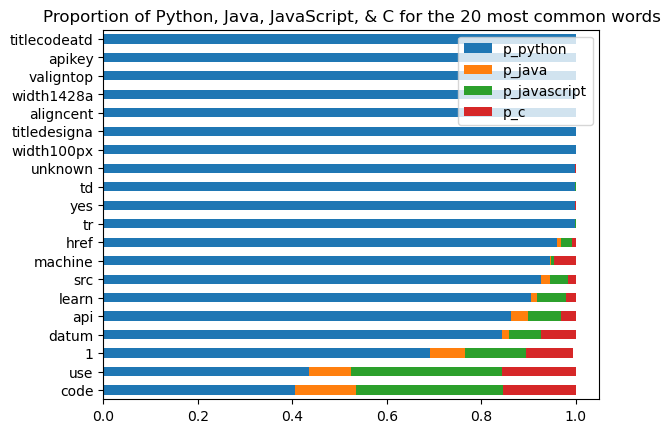

In [191]:
get_perc_word_count()

In [41]:
!pip install --upgrade wordcloud

In [43]:
from wordcloud import WordCloud

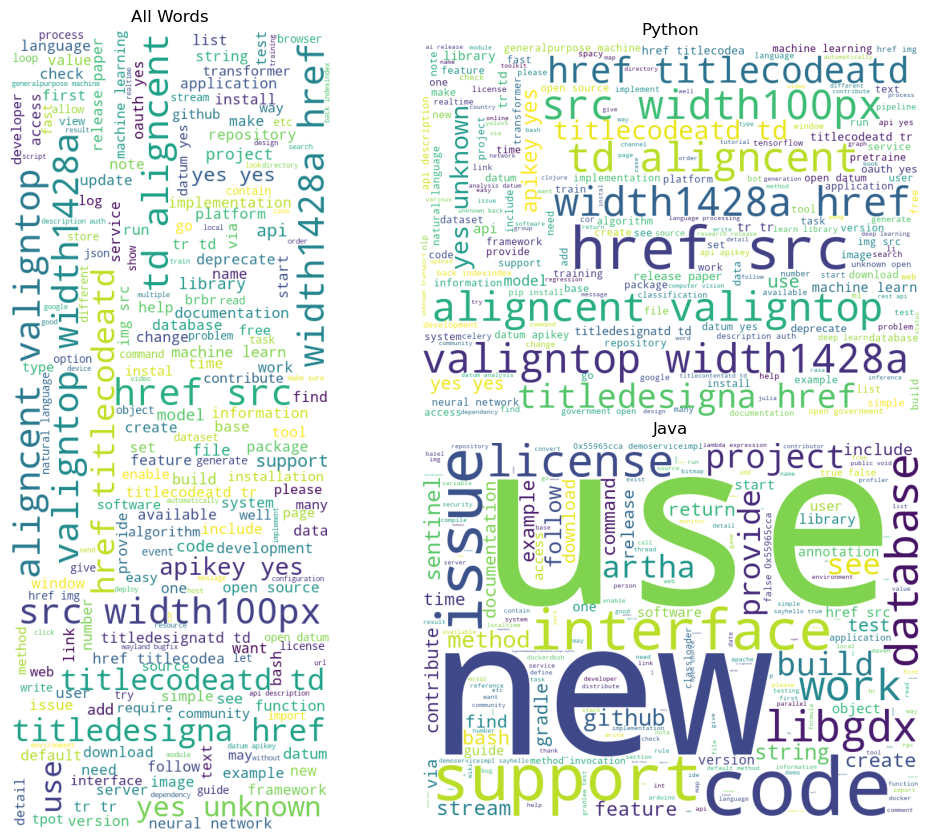

In [86]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
pyhton_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(python_words))
java_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(java_words))
javascript_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(javascript_words))
c_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(c_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(pyhton_cloud)
axs[2].imshow(java_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Python')
axs[2].set_title('Java')

for ax in axs: ax.axis('off')

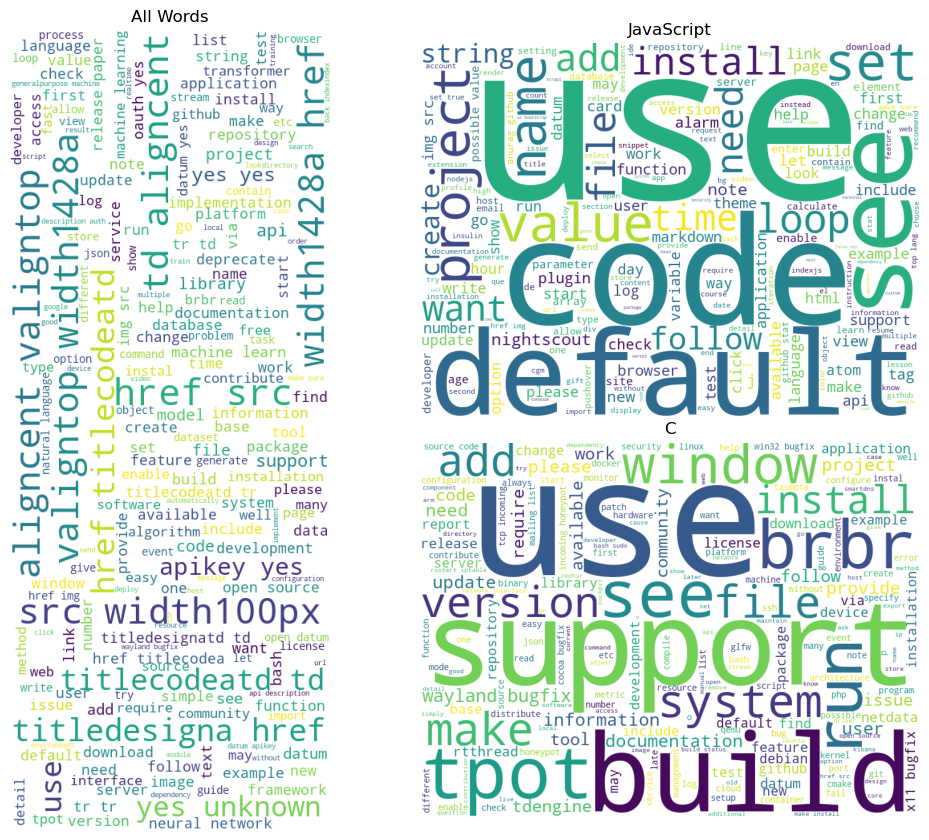

In [87]:
plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(javascript_cloud)
axs[2].imshow(c_cloud)

axs[0].set_title('All Words')
axs[1].set_title('JavaScript')
axs[2].set_title('C')

for ax in axs: ax.axis('off')

# Bigrams

In [ ]:
sentence = 'Mary had a little lamb'

bigrams = nltk.ngrams(sentence.split(), 2)
list(bigrams)

top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams.head()

top_20_ham_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


In [88]:
def get_bigrams(words):
    ''' 
    '''
    
    return (pd.Series(nltk.ngrams(words, 2))
                      .value_counts()
                      .head(20))

In [89]:
all_bigrams = get_bigrams(all_words)
python_bigrams = get_bigrams(python_words)
java_bigrams = get_bigrams(java_words)
javascript_bigrams = get_bigrams(javascript_words)
c_bigrams = get_bigrams(c_words)

In [90]:
def get_bigram_chart(bigram_series, title):

    bigram_series.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

    plt.title(f'Frequently occurring {title} bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')

    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = bigram_series.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
    _ = plt.yticks(ticks, labels)
    plt.show()
    return

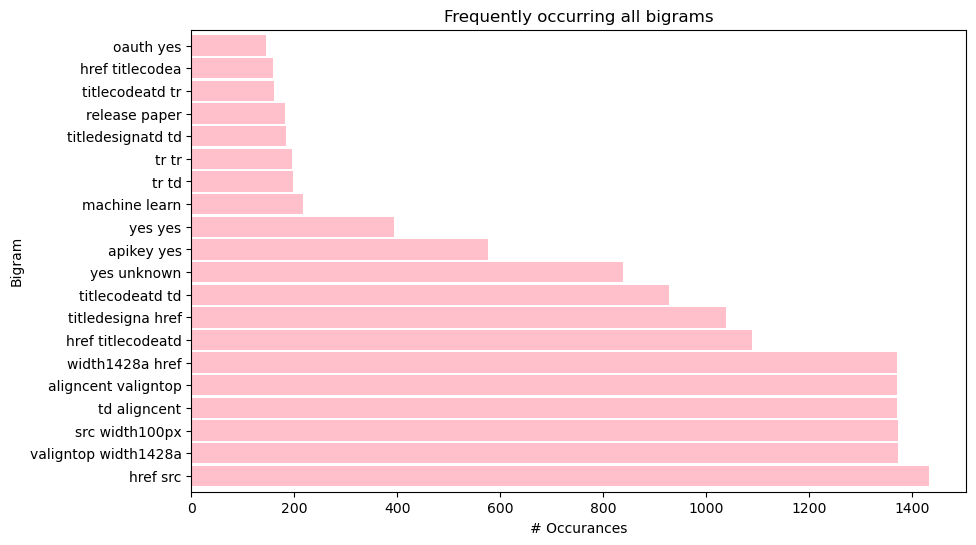

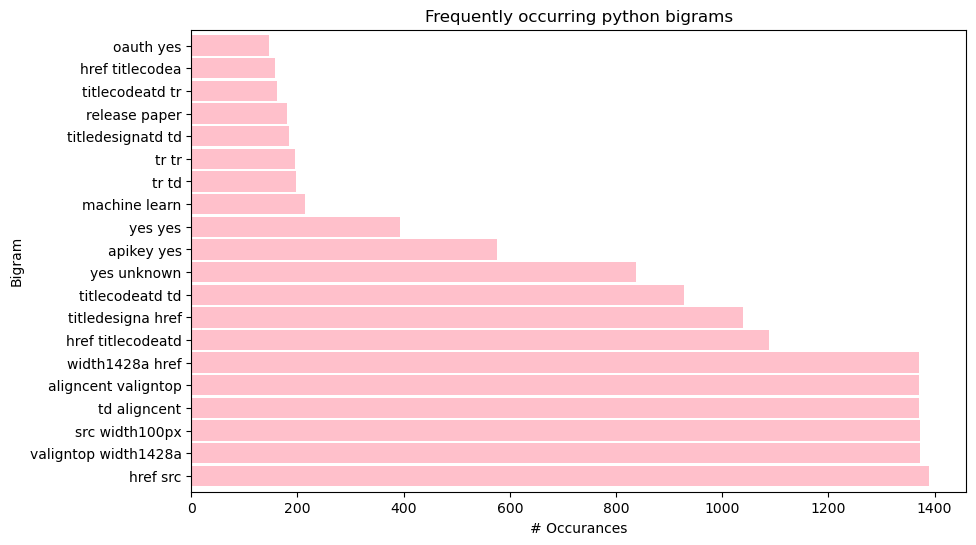

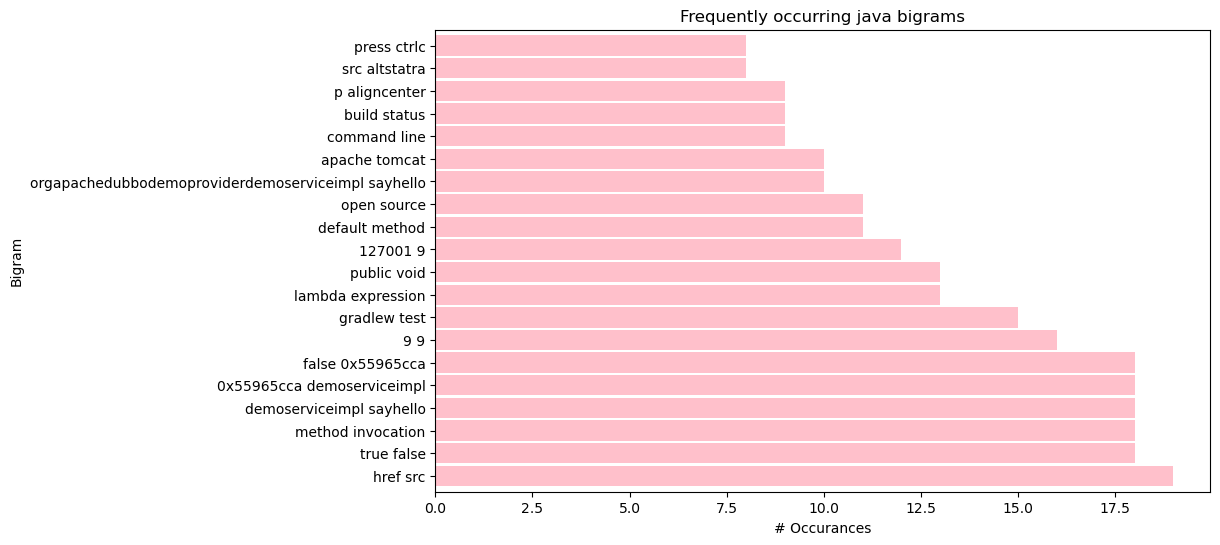

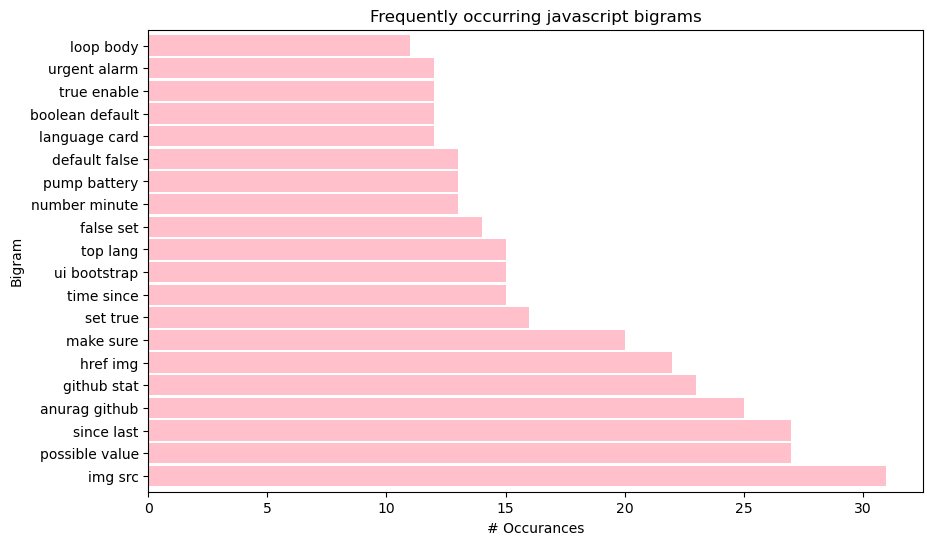

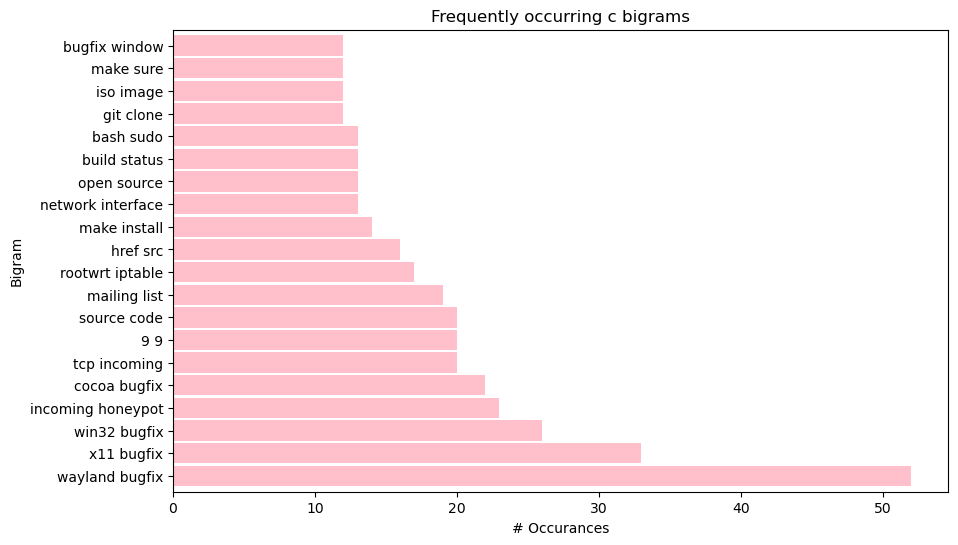

In [91]:
get_bigram_chart(all_bigrams, 'all')
get_bigram_chart(python_bigrams, 'python')
get_bigram_chart(java_bigrams, 'java')
get_bigram_chart(javascript_bigrams, 'javascript')
get_bigram_chart(c_bigrams, 'c')


##### Takeaways:
* The bigrams have similarites between python, and java, but that is the html 

### What are the most common words in READMEs?

In [92]:
all_freq.head(10).index

Index(['href', 'yes', 'src', 'td', 'width100px', 'valigntop', 'width1428a',
       'aligncent', 'titlecodeatd', 'titledesigna'],
      dtype='object')

Text(0.5, 1.0, 'Counts of the 20 Most Common Words')

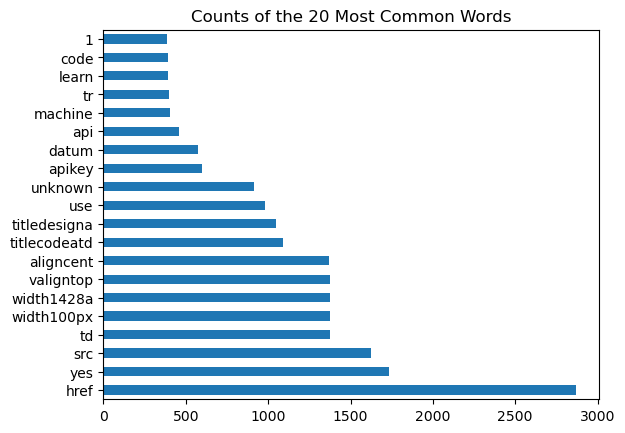

In [194]:
def get_common_words():
    
    # figure out the percentage of spam vs ham
    word_counts['all'].sort_values(ascending=False).head(20).plot.barh()

    plt.title('Counts of the 20 Most Common Words')
    plt.show()
    return

### Does the length of the README vary by programming language?

In [72]:
# check it out 
prep_df.head()

,repo,language,readme_contents,basic_clean_with_code,spacy,lem
0,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...
1,soyHenry/Prep-Course,JavaScript,![HenryLogo](https://d31uz8lwfmyn8g.cloudfront...,henrylogo prep course introduccion hola bienve...,henrylogo prep course introduccion hola bienve...,henrylogo prep course introduccion hola bienve...
2,udacity/frontend-nanodegree-resume,JavaScript,# Project Details\n## How do I complete this p...,project details complete project review online...,project detail complete project review online ...,project detail complete project review online ...
3,odoo/odoo,JavaScript,[![Build Status](https://runbot.odoo.com/runbo...,build status tech doc help nightly builds odoo...,build status tech doc help nightly build odoo ...,build status tech doc help nightly build odoo ...
4,atom/atom,JavaScript,# Atom\n\n[![Build status](https://dev.azure.c...,atom build status atom repositories atom archi...,atom build status atom repository atom archive...,atom build status atom repository atom archive...


In [93]:
# getting python only
python = prep_df[prep_df.language == 'Python']

In [98]:
# getting word count
df['word_count_spacy'] = df.spacy.apply(lambda x: len(x.split()))

In [113]:
# getting average word count per language
avg_words_per_lang = {'all':round(sum(df.word_count_spacy)/len(df), 0), 
'python':round(sum(df[df.language == 'Python'].word_count_spacy)/len(df[df.language == 'Python']), 0), 
'java':round(sum(df[df.language == 'Java'].word_count_spacy)/len(df[df.language == 'Java']), 0), 
'javascript':round(sum(df[df.language == 'JavaScript'].word_count_spacy)/len(df[df.language == 'JavaScript']), 0), 
'c':round(sum(df[df.language == 'C'].word_count_spacy)/len(df[df.language == 'C']), 0)}
avg_words_per_lang

{'all': 958.0,
 'python': 2397.0,
 'java': 348.0,
 'javascript': 595.0,
 'c': 566.0}

##### Takeaway:
* Python has the longer average lengths for each, use the word count as a feature to use

### Do different programming languages use a different number of unique words?

In [124]:
{'python': pd.Series(python_words).nunique(), 
'java': pd.Series(java_words).nunique(), 
'javascript':pd.Series(javascript_words).nunique(), 
'c':pd.Series(c_words).nunique()}
# it appears so

{'python': 16084, 'java': 3052, 'javascript': 3938, 'c': 4115}

In [127]:
# add a feature that shows the unique words
df['nunique'] = df.spacy.apply(lambda x: pd.Series(x.split()).nunique())

/var/folders/fj/7fbysvvn7956npcj9d4mxfxw0000gn/T/ipykernel_2115/30067885.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['nunique'] = df.spacy.apply(lambda x: pd.Series(x.split()).nunique())


### Are there any words that uniquely identify a programming language?

# Modeling

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [139]:
# taking out the null
df.dropna(inplace=True)

In [196]:
# basic x and y
X = df.spacy
y = df.language

X2, X_test, y2, y_test = train_test_split(X, y, stratify=y, test_size=.1)

X_train, X_validate, y_train, y_validate = train_test_split(X2, y2, stratify=y2, test_size=.2)


tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_validate = tfidf.transform(X_validate)

train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))

lm = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
validate['predicted'] = lm.predict(X_validate)

In [197]:
def results1():
    ''''''
    print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
    print('---')
    print('Confusion Matrix')
    print(pd.crosstab(train.predicted, train.actual))
    print('---')
    print(classification_report(train.actual, train.predicted))
    return

Accuracy: 97.65%
---
Confusion Matrix
actual       C  Java  JavaScript  Python
predicted                               
C           19     0           0       0
Java         2    22           0       0
JavaScript   0     0          21       0
Python       0     0           0      21
---
              precision    recall  f1-score   support

           C       1.00      0.90      0.95        21
        Java       0.92      1.00      0.96        22
  JavaScript       1.00      1.00      1.00        21
      Python       1.00      1.00      1.00        21

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85



In [198]:
def results2():
    '''
    '''
    print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted)))
    print('---')
    print('Confusion Matrix')
    print(pd.crosstab(validate.predicted, validate.actual))
    print('---')
    print(classification_report(validate.actual, validate.predicted))
    return

Accuracy: 40.91%
---
Confusion Matrix
actual      C  Java  JavaScript  Python
predicted                              
C           3     0           2       0
Java        1     2           2       1
JavaScript  1     2           2       2
Python      1     1           0       2
---
              precision    recall  f1-score   support

           C       0.60      0.50      0.55         6
        Java       0.33      0.40      0.36         5
  JavaScript       0.29      0.33      0.31         6
      Python       0.50      0.40      0.44         5

    accuracy                           0.41        22
   macro avg       0.43      0.41      0.42        22
weighted avg       0.43      0.41      0.42        22



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(documents.values())
tfidfs

In [182]:
import numpy as np
# modeling imports
from sklearn.ensemble import (GradientBoostingClassifier, VotingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# evalutaion metrics
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)

def predictions(x_set,y_set, X_validate, y_validate):
    '''
    Actions: Gets dataframe with evaluation scores for SVC, GradientBoost, and LogisticRegression classifiers
    '''
    
    # initialize lists to hold metrics
    accuracy,precision,recall,f1,conf_mat= [],[],[],[],[]
    
    # set a random state
    random_state = 1017
    
#     # set baseline predictions
#     y_preds = np.zeros(X_validate.shape[0])

#     # adding metrics for baseline
#     accuracy.append((round(accuracy_score(y_validate,y_preds),2))*100)
#     precision.append((round(precision_score(y_validate,y_preds),2))*100)
#     recall.append((round(recall_score(y_validate,y_preds),2))*100)
#     f1.append((round(f1_score(y_validate,y_preds),2))*100)
#     conf_mat.append(confusion_matrix(y_validate,y_preds))

    
    # intitializing different classifiers
    clf1 = SVC(random_state=random_state, probability=True)
    clf2 = GradientBoostingClassifier(random_state=random_state)
    clf3 = LogisticRegression(random_state = random_state)
    clf4 = LogisticRegression(C=.25, random_state = random_state)
    clf5 = LogisticRegression(C=.5, random_state = random_state)

    # initializing voting classifier with top three classifiers from above
    eclf = VotingClassifier(estimators=[
        ('svc', clf1),('gbc', clf2), ('lr', clf3), ('lr.5', clf4), ('lr.25', clf5)])
    
    
    # initialize classifier list
    classifiers = []
    
    # adding classification models to be used
    classifiers.append(clf1)
    classifiers.append(clf2)
    classifiers.append(clf3)    
    classifiers.append(clf4)
    classifiers.append(clf5)
    classifiers.append(eclf)
    
    # for each classification method in the list
    for clf in classifiers:
        
        # fit classifier
        clf.fit(x_set,y_set)
        
        # assign predictions to variable
        y_preds = clf.predict(X_validate)
        
        # appending the metrics to each repsective metric list
        accuracy.append((round(accuracy_score(y_validate,y_preds),2))*100)
        precision.append(precision_score(y_validate,y_preds, average=None))
        recall.append(recall_score(y_validate,y_preds, average=None))
        f1.append(f1_score(y_validate,y_preds, average=None))
        conf_mat.append(confusion_matrix(y_validate,y_preds))

    # creating a dataframe with the metrics from the list and each algorithm name
    results_dict = {"Recall Score":recall,
                               "Accuracy Score":accuracy,
                               "Precision Score":precision,
                               "f1 Score":f1,
                               "Confusion Matrix":conf_mat,
                               "Algorithm":["Baseline",
                                            "SVC",
                                            "GradientBoosting",
                                            "LogisticRegression",
                                            "LR C=.25",
                                            "LR C=.5",
                                            "VotingClassifier"]}
                                     
#     # sorting algorithm name alphabetically and setting index to the algorithm name 
#     results_df = results_df.sort_values(by = 'Algorithm').set_index('Algorithm')
    
    # exit function and return df
    return results_dict

In [188]:
predictions(X_train, y_train, X_validate, y_validate)

{'Recall Score': [array([0.66666667, 0.6       , 1.        , 0.4       ]),
  array([0.5       , 0.8       , 0.66666667, 0.4       ]),
  array([0.66666667, 0.8       , 1.        , 0.4       ]),
  array([0.66666667, 0.8       , 0.66666667, 0.4       ]),
  array([0.66666667, 0.8       , 1.        , 0.4       ]),
  array([0.66666667, 0.8       , 1.        , 0.4       ])],
 'Accuracy Score': [68.0, 59.0, 73.0, 64.0, 73.0, 73.0],
 'Precision Score': [array([0.57142857, 0.75      , 0.66666667, 1.        ]),
  array([0.6       , 0.5       , 0.66666667, 0.66666667]),
  array([0.66666667, 0.57142857, 0.85714286, 1.        ]),
  array([0.66666667, 0.4       , 1.        , 1.        ]),
  array([0.66666667, 0.57142857, 0.85714286, 1.        ]),
  array([0.66666667, 0.57142857, 0.85714286, 1.        ])],
 'f1 Score': [array([0.61538462, 0.66666667, 0.8       , 0.57142857]),
  array([0.54545455, 0.61538462, 0.66666667, 0.5       ]),
  array([0.66666667, 0.66666667, 0.92307692, 0.57142857]),
  array([